In [414]:
import numpy as np
import pandas as pd

In [417]:
## thesis specific import ##
import sys
import imp
sys.path.append('./src/')
import doc_utils

In [418]:
imp.reload(doc_utils)  

<module 'doc_utils' from './src/doc_utils.py'>

In [419]:
doc_path_list = doc_utils.get_labeled_files()
doc_obj_list = doc_utils.get_doc_objects(doc_path_list)

tmp/lamedbet21_l.docx
tmp/nun2_l.docx
tmp/aingimel3_l.docx


In [420]:
doc_db_columns = ['path','file_name','client_tag','therapist_tag','num_par']

In [421]:
par_db_columns = ['doc_idx','text','par_type','is_nar','nar_idx','nar_len']
par_db = pd.DataFrame(columns=par_db_columns)
par_db

,doc_idx,text,par_type,is_nar,nar_idx,nar_len


In [427]:
doc_db = pd.DataFrame(columns=doc_db_columns)

for path in doc_path_list:
    print (path)
    doc_utils.add_doc_to_db(path,doc_db)

tmp/lamedbet21_l.docx
tmp/lamedbet21_l.docx
tmp/nun2_l.docx
tmp/nun2_l.docx
tmp/aingimel3_l.docx
tmp/aingimel3_l.docx


In [428]:
doc_db

,path,file_name,client_tag,therapist_tag,num_par
0,tmp/lamedbet21_l.docx,lamedbet21_l.docx,לבקל,לבמט,450
1,tmp/nun2_l.docx,nun2_l.docx,נקל,נמט,166
2,tmp/aingimel3_l.docx,aingimel3_l.docx,עגקל,עגמט,229


In [429]:
par_db

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar
0,0.000000,CLIENT,client,0.000000,NaN,NaN,NaN
1,0.000000,THERAPIST,therapist,0.000000,NaN,NaN,NaN
2,0.000000,@התחל,no_mark,0.000000,NaN,NaN,NaN
3,0.000000,@שפה: עב,no_mark,0.000000,NaN,NaN,NaN
4,0.000000,"@משתתפים: קליינט, לבמט מטפל",client,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
840,2.000000,*:\tאממ (..) לא אין לי משהו קונקרטי.,client,0.000000,NaN,NaN,NaN
841,2.000000,*:\tבסדר. טוב. אז (..) אני אמשיך את הנושא המחק...,therapist,0.000000,NaN,NaN,NaN
842,2.000000,*:\tכן.,client,0.000000,NaN,NaN,NaN
843,2.000000,*:\tבסדר.,therapist,0.000000,NaN,NaN,NaN


In [430]:
par_db = pd.DataFrame(columns=par_db_columns)
par_db.iloc[:,1:] = par_db.iloc[:,1:].astype('int32')
for doc_idx in doc_db.index:
    doc_utils.add_paragraphs_to_db(doc_idx,doc_db,par_db)

skipping for doc 0 entry 2 type no_mark text @התחל
skipping for doc 0 entry 3 type no_mark text @שפה: עב
skipping for doc 0 entry 5 type segment text סגמנט 1
update nar 0 len to 7
skipping for doc 0 entry 64 type segment text (דקה 5) – סגמנט 2
update nar 1 len to 1
update nar 2 len to 2
skipping for doc 0 entry 111 type segment text דקה 10 – סגמנט 3
update nar 3 len to 5
skipping for doc 0 entry 159 type segment text (דקה 15) – סגמנט 4
update nar 4 len to 9
skipping for doc 0 entry 189 type segment text דקה 20 – סגמנט 5
update nar 5 len to 1
skipping for doc 0 entry 232 type segment text (דקה 25) – סגמנט 6 יש בזה משהו.. אני.. אני אדם של.. כאילו גם חברים שלי חושבים שאני קצת ילדותי בקטע הזה
skipping for doc 0 entry 293 type segment text דקה 30 – סגמנט 7
update nar 6 len to 44
update nar 7 len to 1
update nar 8 len to 1
skipping for doc 0 entry 329 type segment text  (דקה 35) – סגמנט 8
update nar 9 len to 3
skipping for doc 0 entry 369 type segment text דקה 40 – סגמנט 9
skipping for doc 0

In [431]:
par_db.describe()

,doc_idx,is_nar,nar_idx,nar_len,idx_in_nar
count,845.000000,845.000000,159.000000,157.000000,159.000000
mean,0.738462,0.188166,4.113208,6.579618,8.496855
std,0.857915,0.391076,3.219759,5.398394,10.939925
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,1.000000
50%,0.000000,0.000000,4.000000,4.000000,4.000000
75%,2.000000,0.000000,6.000000,9.000000,10.500000
max,2.000000,1.000000,12.000000,17.000000,43.000000


In [432]:
par_db = doc_utils.clean_text(par_db)

./src/doc_utils.py:86: FutureWarning: The default value of regex will change from True to False in a future version.
  return df


In [433]:
par_db= doc_utils.add_length_of_paragraphs(par_db)

In [434]:
par_db

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len
0,0.000000,CLIENT,client,0.000000,NaN,NaN,NaN,7
1,0.000000,THERAPIST,therapist,0.000000,NaN,NaN,NaN,10
2,0.000000,התחל,no_mark,0.000000,NaN,NaN,NaN,4
3,0.000000,שפה עב,no_mark,0.000000,NaN,NaN,NaN,6
4,0.000000,משתתפים קליינט לבמט מטפל,client,0.000000,NaN,NaN,NaN,26
...,...,...,...,...,...,...,...,...
840,2.000000,אממ לא אין לי משהו קונקרטי,client,0.000000,NaN,NaN,NaN,28
841,2.000000,בסדר טוב אז אני אמשיך את הנושא המחקרי ואז ניפרד,therapist,0.000000,NaN,NaN,NaN,48
842,2.000000,כן,client,0.000000,NaN,NaN,NaN,3
843,2.000000,בסדר,therapist,0.000000,NaN,NaN,NaN,5


In [381]:
par_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 844
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   doc_idx     845 non-null    float64
 1   text        845 non-null    object 
 2   par_type    845 non-null    object 
 3   is_nar      845 non-null    float64
 4   nar_idx     159 non-null    float64
 5   nar_len     157 non-null    float64
 6   idx_in_nar  159 non-null    float64
 7   par_len     845 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 91.7+ KB


In [382]:
par_db.describe()

,doc_idx,is_nar,nar_idx,nar_len,idx_in_nar,par_len
count,845.000000,845.000000,159.000000,157.000000,159.000000,845.000000
mean,0.738462,0.188166,4.113208,6.579618,8.496855,84.344379
std,0.857915,0.391076,3.219759,5.398394,10.939925,173.100835
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,1.000000,10.000000
50%,0.000000,0.000000,4.000000,4.000000,4.000000,32.000000
75%,2.000000,0.000000,6.000000,9.000000,10.500000,86.000000
max,2.000000,1.000000,12.000000,17.000000,43.000000,1841.000000


In [383]:
par_db.loc[par_db['nar_idx']==1]

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len
81,0.000000,אין מה לעשות שם בצפון אין מה לעשות שם בעיר באר...,client,1.000000,1.000000,9.000000,0.000000,176
463,1.000000,אני חושב שבעבודה היה עיקר הקושי אה פשוט אה אני...,client,1.000000,1.000000,9.000000,0.000000,1494
467,1.000000,שאתה אחד מהם,therapist,1.000000,1.000000,9.000000,1.000000,12
468,1.000000,שאני הצטרפתי אליהם זתומרת אנחנו שלושה אמ ו אמ...,client,1.000000,1.000000,9.000000,2.000000,1719
469,1.000000,ששק הוא הבחור השלישי שכרגע בצוות חוץ ממך ומאל,therapist,1.000000,1.000000,9.000000,3.000000,45
470,1.000000,בדיוק,client,1.000000,1.000000,9.000000,4.000000,5
471,1.000000,אוקיי,therapist,1.000000,1.000000,9.000000,5.000000,5
472,1.000000,השלישי ו,client,1.000000,1.000000,9.000000,6.000000,8
473,1.000000,שהוא לא היה מעורב בעניין הזה של סידור המשמרות ...,therapist,1.000000,1.000000,9.000000,7.000000,57
474,1.000000,הוא לא היה מעורב,client,1.000000,1.000000,9.000000,8.000000,16


In [384]:
par_db.loc[par_db['par_type']=='no_mark']

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len
2,0.000000,התחל,no_mark,0.000000,NaN,NaN,NaN,4
3,0.000000,שפה עב,no_mark,0.000000,NaN,NaN,NaN,6
446,0.000000,סיום,no_mark,0.000000,NaN,NaN,NaN,4
447,0.000000,דקה 4730,no_mark,0.000000,NaN,NaN,NaN,8
448,0.000000,,no_mark,0.000000,NaN,NaN,NaN,0
449,0.000000,,no_mark,0.000000,NaN,NaN,NaN,0
454,1.000000,,no_mark,0.000000,NaN,NaN,NaN,0
455,1.000000,התחל,no_mark,0.000000,NaN,NaN,NaN,5
456,1.000000,שפהעב,no_mark,0.000000,NaN,NaN,NaN,6
464,1.000000,,no_mark,0.000000,NaN,NaN,NaN,0


In [385]:
par_db.loc[par_db['is_nar']==1]

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len
35,0.000000,היה אמור להיות לי ראיון אבל כאילו ב10 היה אמור...,client,1.000000,0.000000,17.000000,0.000000,76
36,0.000000,היום,therapist,1.000000,0.000000,17.000000,1.000000,4
37,0.000000,לא לא ביום שלישי,client,1.000000,0.000000,17.000000,2.000000,16
38,0.000000,אה אוקיי,therapist,1.000000,0.000000,17.000000,3.000000,8
39,0.000000,ו זהו הייתי כבר כאילו באתי עם המון ציפיות וזה ...,client,1.000000,0.000000,17.000000,4.000000,261
...,...,...,...,...,...,...,...,...
813,2.000000,זה היה החשש הגדול שלי שזה ייתפס לא טוב,client,1.000000,11.000000,6.000000,2.000000,39
814,2.000000,גם ככה באת גם לבוס וגם לבחורה ההיא אמרת לפחות ...,therapist,1.000000,11.000000,6.000000,3.000000,135
815,2.000000,אמרתי זה לא מגיע ממקום של תלונה של רע לי טוב ל...,client,1.000000,11.000000,6.000000,4.000000,174
817,2.000000,כאילו אני לא רציתי להציג את זה כהנה רע לי ואני...,client,1.000000,11.000000,6.000000,5.000000,155


<AxesSubplot:xlabel='par_type', ylabel='count'>

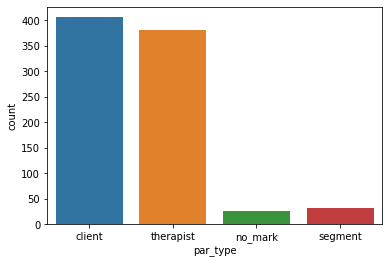

In [386]:
sns.countplot(x='par_type',data=par_db)

<AxesSubplot:xlabel='is_nar', ylabel='count'>

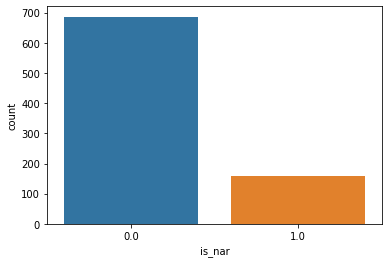

In [387]:
sns.countplot(x='is_nar',data=par_db)

<AxesSubplot:xlabel='nar_len', ylabel='Count'>

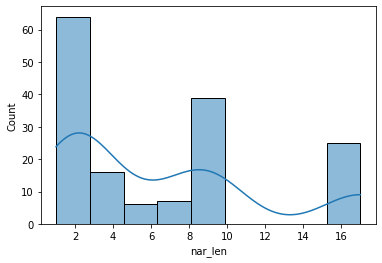

In [388]:
sns.histplot(x='nar_len',data=par_db, kde=True)

In [389]:
par_db.groupby(by='is_nar').mean()

,doc_idx,nar_idx,nar_len,idx_in_nar,par_len
is_nar,,,,,
0.000000,0.695335,NaN,NaN,NaN,63.741983
1.000000,0.924528,4.113208,6.579618,8.496855,173.232704


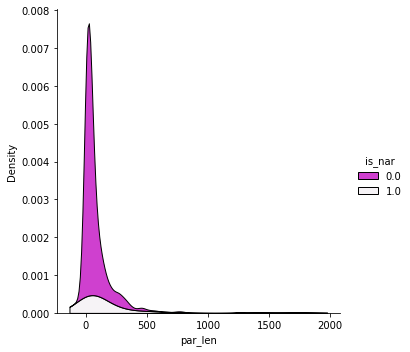

In [390]:
# sns.countplot(x='par_len',data=par_db,hue='is_nar')
sns.displot(data=par_db, x="par_len", hue="is_nar", multiple="stack", kind="kde",palette="light:m_r")

<AxesSubplot:xlabel='par_len', ylabel='nar_len'>

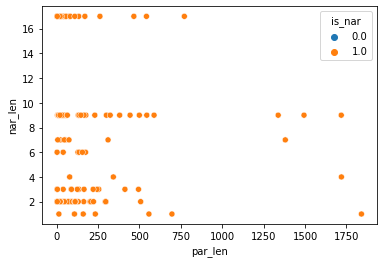

In [391]:
sns.scatterplot(data=par_db, x="par_len", y="nar_len", hue="is_nar")

total data len: 845
len train: 633, len test: 212
['10', 'xxx', 'אבא', 'אגיד', 'אה', 'אומרת', 'אוקי', 'אוקיי', 'איזשהו', 'איזשהי', 'איתה', 'איתך', 'איתם', 'אליו', 'אליי', 'אמ', 'אממ', 'אמרה', 'אמרת', 'אמרתי']
['זהו', 'זוג', 'זוכר', 'חברים', 'חוזר', 'יחסים', 'ילד', 'כאילו', 'כושר', 'כשאני', 'כשאתה', 'לאו', 'לאמא', 'לבוס', 'לבמט', 'להבין', 'לומד', 'לחשוב', 'ללמוד', 'למצב']
['10', 'אממ', 'במקומות', 'הגבולות', 'והם', 'כשאתה', 'לרצות', 'ממך', 'נשמע', 'קורה', 'תראה']


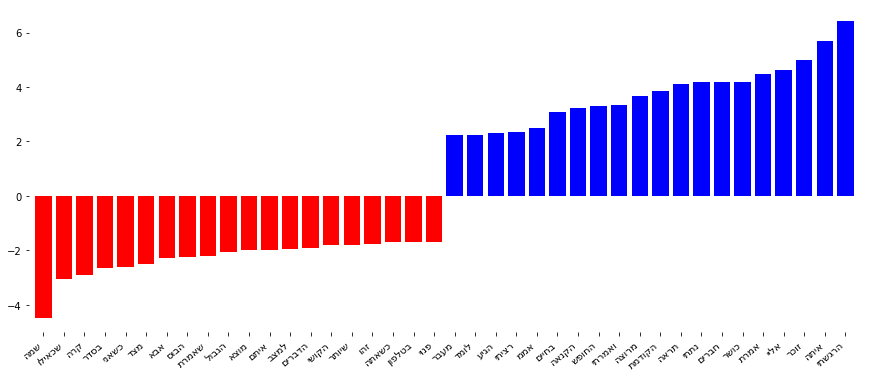

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       172
         1.0       0.33      0.15      0.21        40

    accuracy                           0.78       212
   macro avg       0.58      0.54      0.54       212
weighted avg       0.73      0.78      0.75       212



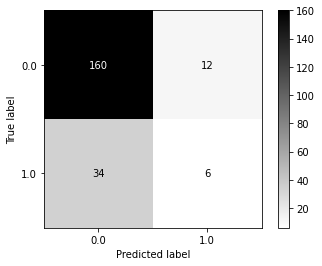

In [395]:
doc_utils.run_model(par_db)

## Create narrative DB

In [396]:
nar_db = par_db.groupby(by='nar_idx')['text'].apply(' '.join).reset_index()

In [398]:
nar_db = doc_utils.clean_text(nar_db)

./src/doc_utils.py:86: FutureWarning: The default value of regex will change from True to False in a future version.
  return df


In [399]:
par_db['block_idx'] = par_db['is_nar'].diff().ne(0).cumsum()

In [400]:
not_nar_db = par_db[par_db['is_nar']==0].groupby(by='block_idx')['text'].apply(' '.join).reset_index()

In [401]:
list(not_nar_db[not_nar_db['block_idx']==21]['text'])

['אבל אני חושבת על המקום שלך שצריך חופש בתוך מערכת יחסים  אני כן אני מזל קשת אני חייב את זה שמה זה החופש הזה מה זה אומר בעצם זה לאו דווקא ללכת ו לפתוח את המערכת יחסים כמו שהרבה אנשים עושים זה אם זה לצאת למסיבה זה בא לי לצאת לבד לא בא לי לצאת איתך בא לי להיות איתך בהרבה דברים אחרים אבל אם אני רוצה לצאת למסיבה ספציפית בא לי להיות עם חברים שלי אני הרבה יותר משוחרר כשאני עם חברים שלי לבד כן כי אתה לוקח לי את כל האנרגיה במסיבה ומחפש את זה שאני כל הזמן אהיה רק איתך כאילו צריך לדאוג לו צריךלראות מה קורה איתו כן אתה תרצה עכשיו וודקה רד בול ואתה תרצה זה ואתה תרצה זה ואתה תרצה שאני אחבק אותך ואתה ואני לא אוהב להיות כאילו מול כל כך הרבה אנשים שאני כל הזמן איתך  כאילו אתה צריך להיות בתפקיד מולו יש תפקיד מולו כן תפקיד הבן זוג שכל הזמן עוטף כאילו יכול להיות שאם זה היה בן זוג אחר בן זוג שנורא משוחרר ועצמאי כאילו ויכול להיות במסיבה הזאת עם עצמו אז יכול להיות שלא היה אכפת לך שהוא יהיה שם נכון נכון לגמרי אפשר גם להיות במצבים כאלה איתו זה לא  כן אבל אני מאוד יכולה לראות את הרצון שלך להיות בתוך מערכת יחסי

In [402]:
not_nar_db['is_nar'] = 0

In [403]:
nar_db['is_nar'] = 1

In [404]:
mixed_nar_db = not_nar_db.append(nar_db,ignore_index=True)

In [405]:
mixed_nar_db.drop(['block_idx','nar_idx'],axis=1,inplace=True)

In [406]:
mixed_nar_db

,text,is_nar
0,CLIENT THERAPIST התחל שפה עב משתתפים קליינט...,0
1,כן כן אולי זה דווקא טוב אולי אני אשלח עוד קצת ...,0
2,כן ברור אבל אין מה לעשות עשיתי טעות למה טעות כ...,0
3,דקה 10 – סגמנט 3,0
4,מעניין אני תוהה למה כאילו על כאילו כמה זה מבי...,0
5,אני לא יודעת אתה שאלנו את זה כבר נראה לי בעבר ...,0
6,מה מה מה יקרה אם מישהו ישים עליך כסף XXX לא...,0
7,דקה 30 – סגמנט 7,0
8,מה היה גורם הקנאה הזאת היה כאילו ריבים סביבה כ...,0
9,שמה מממ הייתי מקריא לך את זה עכשיו אם הייתי מו...,0


total data len: 49
len train: 36, len test: 13
['10', 'xxx', 'אה', 'אומרת', 'אוקיי', 'איזו', 'איזשהו', 'איתם', 'אליו', 'אליי', 'אמ', 'אממ', 'אמרו', 'אמרת', 'אמרתי', 'באיזה', 'בחברה', 'בחיים', 'בטח', 'ביחד']
['וואי', 'וואלה', 'וזהו', 'וכאילו', 'זהו', 'זוכר', 'חברה', 'חברים', 'חודשיים', 'ידעתי', 'ילד', 'יצא', 'ישבתי', 'כאילו', 'לאו', 'לאמא', 'לבמט', 'להבין', 'לילה', 'למצב']
['10', 'אממ', 'בעבר', 'היית', 'וואו', 'ילד', 'לצאת', 'מכיר', 'נשמע', 'צוחק']


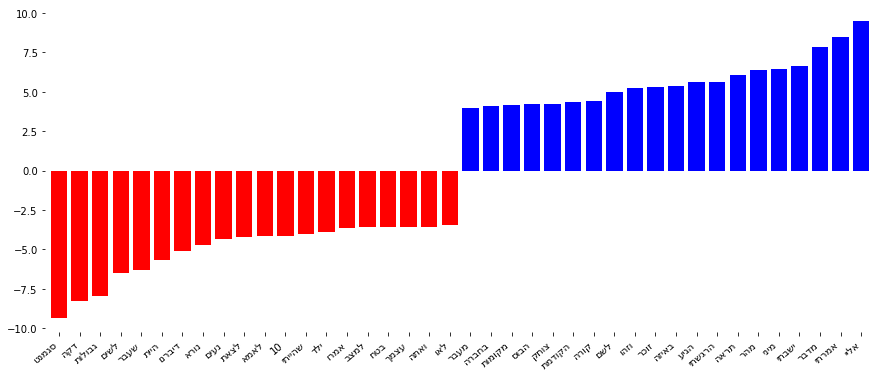

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      1.00      0.86         3

    accuracy                           0.92        13
   macro avg       0.88      0.95      0.90        13
weighted avg       0.94      0.92      0.93        13



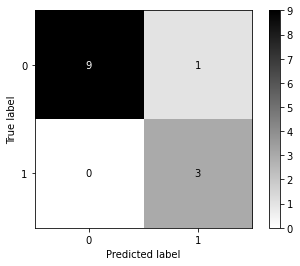

In [408]:
doc_utils.run_model(mixed_nar_db)

In [412]:
doc_utils.show_data_basic_information(doc_db)

Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   path           3 non-null      object
 1   file_name      3 non-null      object
 2   client_tag     3 non-null      object
 3   therapist_tag  3 non-null      object
 4   num_par        3 non-null      object
dtypes: object(5)
memory usage: 252.0+ bytes
None

**********

Shape

(3, 5)

**********

Amount of is null data

0

**********

Describe



,path,file_name,client_tag,therapist_tag,num_par
count,3,3,3,3,3
unique,3,3,3,3,3
top,tmp/nun2_l.docx,aingimel3_l.docx,נקל,נמט,229
freq,1,1,1,1,1



**********



In [413]:
doc_utils.show_data_basic_information(par_db)

Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 844
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   doc_idx     845 non-null    float64
 1   text        845 non-null    object 
 2   par_type    845 non-null    object 
 3   is_nar      845 non-null    float64
 4   nar_idx     159 non-null    float64
 5   nar_len     157 non-null    float64
 6   idx_in_nar  159 non-null    float64
 7   par_len     845 non-null    int64  
 8   block_idx   845 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 98.3+ KB
None

**********

Shape

(845, 9)

**********

Amount of is null data

688

**********

Describe



,doc_idx,is_nar,nar_idx,nar_len,idx_in_nar,par_len,block_idx
count,845.000000,845.000000,159.000000,157.000000,159.000000,845.000000,845.000000
mean,0.738462,0.188166,4.113208,6.579618,8.496855,84.344379,28.520710
std,0.857915,0.391076,3.219759,5.398394,10.939925,173.100835,19.196937
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,1.000000,10.000000,13.000000
50%,0.000000,0.000000,4.000000,4.000000,4.000000,32.000000,23.000000
75%,2.000000,0.000000,6.000000,9.000000,10.500000,86.000000,43.000000
max,2.000000,1.000000,12.000000,17.000000,43.000000,1841.000000,71.000000



**********



## Initial processing:
- drop 'Unnamed 0' column
- encode author_gender
- add feature - length of the narrative
- (?) - replace birth year with age

In [ ]:
def encode_gender(_df):
    df = _df.copy()
    man = "זכר"
    woman = "נקבה"
    gender = {man: 0, woman: 1}
    df['author_gender'] = [gender[item] for item in df['author_gender']]
    return df

In [ ]:
def add_length_of_narrative(_df):
    df = _df.copy()
    df['nar_length'] = df['narrative'].str.len()
    return df

In [ ]:
# def convert_year_to_age(_df):
#     df = _df.copy()
#     df['nar_length'] = df['narrative'].str.len()
#     return df

In [ ]:
df_steps['1_dropped'] = drop_columns(df_steps['0_full_df'],['Unnamed: 0'])
df_steps['2_gender'] = encode_gender(df_steps['1_dropped'])
df_steps['3_nar_length'] = add_length_of_narrative(df_steps['2_gender'])
df_steps['3_nar_length']

- Plot see the distribution of the data

In [ ]:
sns.pairplot(df_steps['3_nar_length'], hue='label')

In [ ]:
sns.countplot(x='label',data=df_steps['3_nar_length'])
plt.title('Class Distributions \n (0: False || 1: True)', fontsize=14)

In [ ]:
show_random_text(df_steps['3_nar_length'],'narrative',2)

## Conclustion from step 1
- data is balanced
- there is no significant differences between features distribution per label
- narrative has to be cleaned from \n

In [ ]:
df_steps['4_clean_nar'] = df_steps['3_nar_length']
df_steps['4_clean_nar']['narrative'] = df_steps['4_clean_nar']['narrative'].replace(b"<br />", b" ")
df_steps['4_clean_nar']['narrative'] = df_steps['4_clean_nar']['narrative'].replace("n\\",' ')

In [ ]:
show_random_text(df_steps['4_clean_nar'],'narrative',2)

## Step 2 - tokenize the narrative
exaustive search for the best model

In [ ]:
text_train = df_steps['4_clean_nar']['narrative'].tolist()
y_train = df_steps['4_clean_nar']['label']

In [ ]:
text_train

In [ ]:
vect = CountVectorizer(min_df=4)
X_train = vect.fit_transform(text_train)
X_train

In [ ]:
#Vocabulary
feature_names = vect.get_feature_names()
print(feature_names[:10])
print(feature_names[20000:20020])
print(feature_names[::2000])

In [ ]:
lr = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
lr.score(X_train,y_train)

In [ ]:
regressors = [
    LogisticRegression(),
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    Perceptron(),
    RidgeClassifier(),
    RidgeClassifierCV(),
    SGDClassifier()
]
scores_df = pd.DataFrame(dtype=float)

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"count_vectorizer")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
#TfidfVectorizer
tdif = TfidfVectorizer(min_df=4)
X_train = tdif.fit_transform(text_train)

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"TfidfVectorizer")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
# L1 normalization with CountVectorizer
count_vec = CountVectorizer(min_df=4)
X_train = count_vec.fit_transform(text_train)
X_train = normalize(X_train,norm="l1")

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"TfidfVectorizer_norm")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
#ngrams
ngrm = CountVectorizer(ngram_range=(1, 3), min_df=4)
X_train = ngrm.fit_transform(text_train)

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"ngrm")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
cv = CountVectorizer(ngram_range=(1, 3), analyzer="char_wb")
X_train = cv.fit_transform(text_train)
print(f"vocaulary size:{len(cv.vocabulary_)}")

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"_char_wb")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

Get an impression of data by looking at most important features

In [ ]:
tdif = TfidfVectorizer(stop_words='english',min_df=4)
X_train = tdif.fit_transform(text_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

In [ ]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(tdif.get_feature_names()), top_n=20, rotation=40)
ax = plt.gca()
plt.show()

In [ ]:
X,y=get_label_and_drop(df_steps['4_clean_nar'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=101,stratify=y)

In [ ]:
def get_num_text_pipeline(df,regr_num,regr_text):
    numeric_cols = X_train.columns[X_train.columns.dtype != object].tolist()
    
    transformer_text = FunctionTransformer(lambda x: x['narrative'], validate=False)
    transfomer_numeric = FunctionTransformer(lambda x: x[numeric_cols], validate=False)

    pipeline = Pipeline([
        ('features', FeatureUnion([
                ('numeric_features', Pipeline([
                    ('selector', transfomer_numeric)
                ])),
                 ('text_features', Pipeline([
                    ('selector', transformer_text),
                    (regr_text.__class__.__name__, regr_text)
                ]))
             ])),
        ('estimator', regr_num)
    ])
    return pipeline

In [ ]:
regr_text = TfidfVectorizer(min_df=4)

for regr in regressors:
    pipe = get_num_text_pipeline(X_train,regr,regr_text)
    get_cross_val_score(scores_df,pipe, X_train, y_train,regr_text.__class__.__name__+"_combined")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

meantime combined featues haven't improved the results so far...

## spaCy

In [ ]:
import spacy # is it relevant for hebrew? TBD check what we saw on a class on hebrew

In [ ]:
nlp = spacy.load("en_core_web_lg", disable=["tagger", "parser", "ner","lemmatizer"])